In [1]:
import pandas as pd
from omegaconf import OmegaConf
from lib.uncertainty import Simulate
from prettytable import PrettyTable
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


/Users/felix/MSE/03_projects/MT/06_rag/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
EXPERIMENTS = [
    '2026-01-26_20-22_fever_dense',
    '2026-01-26_20-23_fever_sparse',
    '2026-01-26_23-23_fever_hybrid',
    '2026-01-26_20-22_fever_similar',
    '2026-01-26_20-25_fever_oracle',
    '2026-01-26_20-55_fever_random',
    '2026-01-26_23-23_fever_probabilistic-random',
    '2026-01-27_17-16_fever_probabilistic-similar',
]

dataset = {
    'fever': 'Fever',
}

strategy = {
    'oracle': 'Oracle',
    'random': 'Random',
    'similar': 'Similar',
    'dense': 'Dense',
    'sparse': 'Sparse'
}

In [3]:
results_all = {}

for experiment in EXPERIMENTS:
    id = experiment.split('_')

    # cfg = OmegaConf.load(f'../results/{experiment}/config.yaml')
    results = pd.read_json(f'../results/{experiment}/results.json')
    results['correct_query'] = True

    results['date'] = id[0]
    results['time'] = id[1]
    results['dataset'] = id[2]

    results['retriever_strategy'] = id[3]

    results_all[experiment] = results

In [4]:
results['generated_answer'].value_counts()

generated_answer
SUPPORTS           6339
REFUTES            2521
NOT ENOUGH INFO    1140
Name: count, dtype: int64

2026-01-26_20-22_fever_dense
2026-01-26_20-23_fever_sparse
2026-01-26_23-23_fever_hybrid
2026-01-26_20-22_fever_similar
2026-01-26_20-25_fever_oracle
2026-01-26_20-55_fever_random
2026-01-26_23-23_fever_probabilistic-random
2026-01-27_17-16_fever_probabilistic-similar


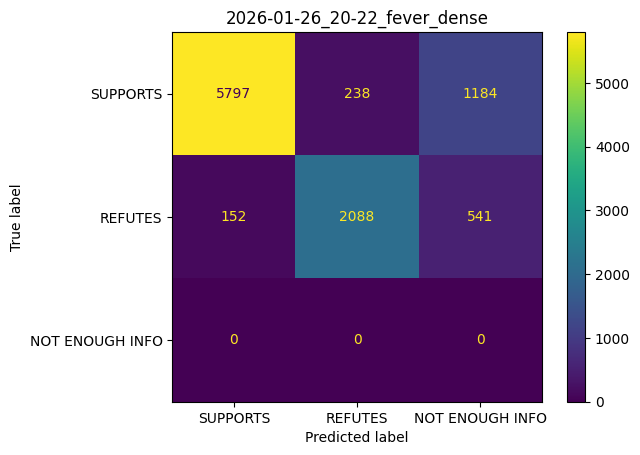

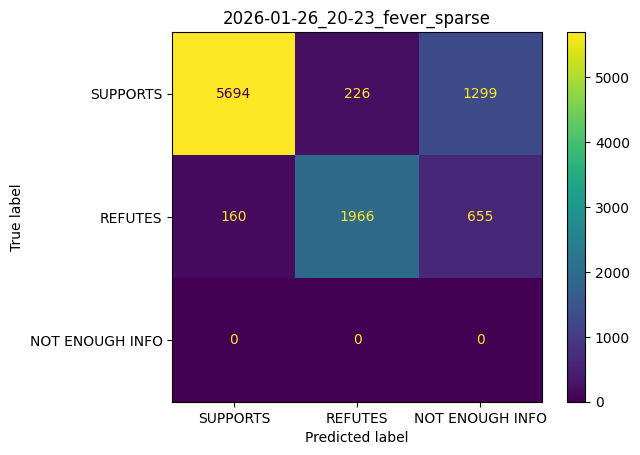

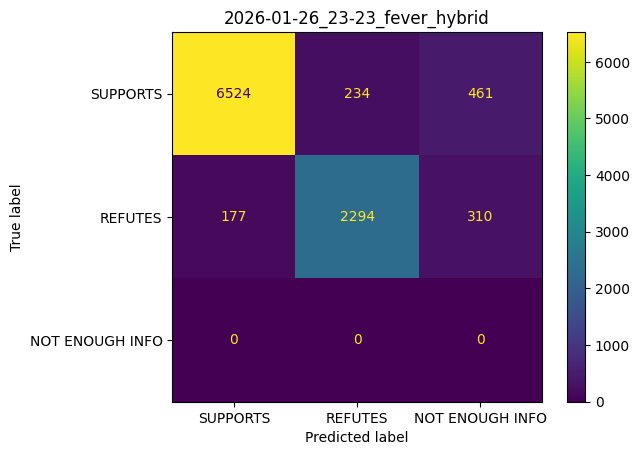

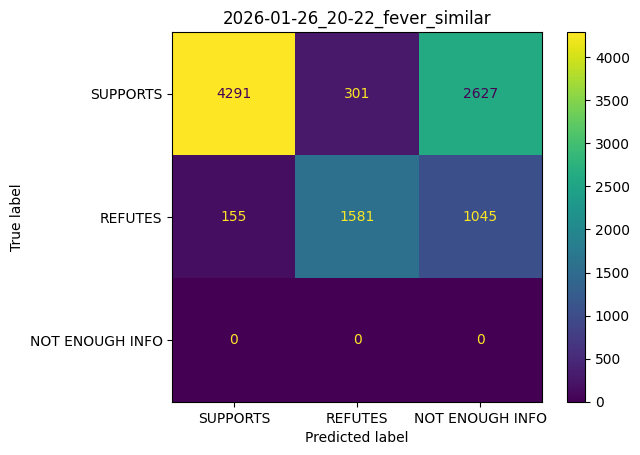

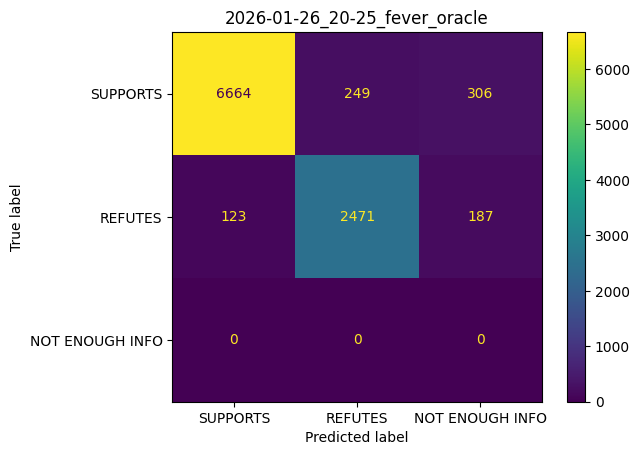

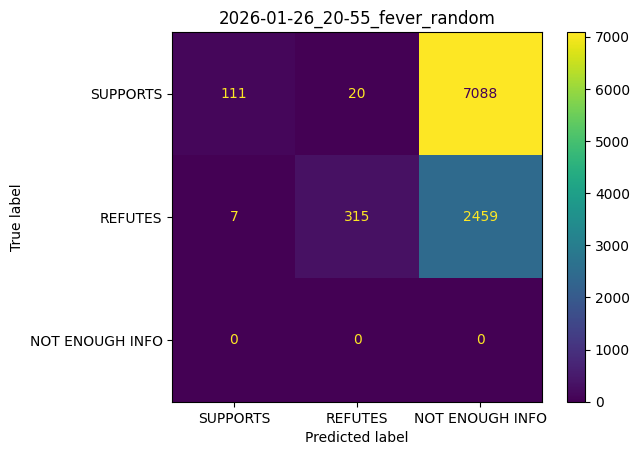

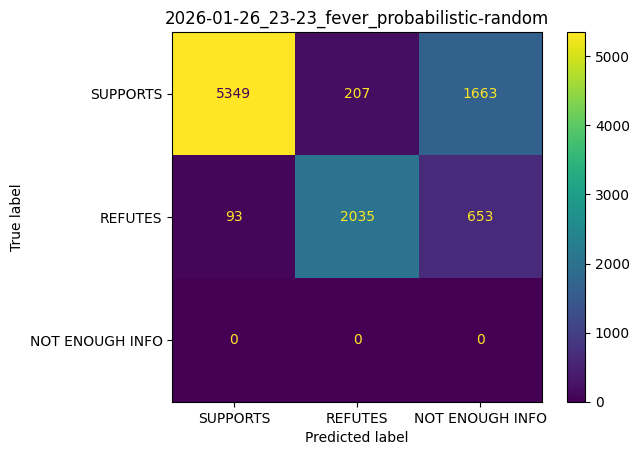

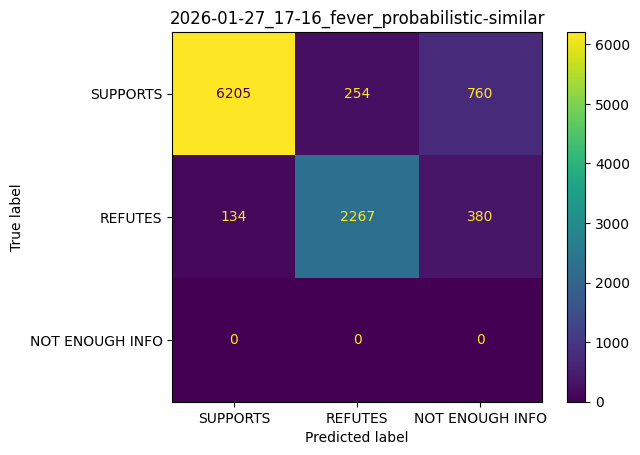

In [5]:
labels = ["SUPPORTS", "REFUTES", "NOT ENOUGH INFO"]
for experiment in EXPERIMENTS:
    print(experiment)
    results = pd.read_json(f'../results/{experiment}/results.json')
    y_true  = results['answer'].to_list()
    y_pred = results['generated_answer'].to_list()

    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax)

    ax.set_title(experiment)


In [6]:
results['generated_answer'].value_counts()

generated_answer
SUPPORTS           6339
REFUTES            2521
NOT ENOUGH INFO    1140
Name: count, dtype: int64

In [7]:
from datasets import load_dataset

ds = load_dataset("facebook/kilt_tasks", name="fever")
df = ds['train'].to_pandas()

In [8]:
df['answer'] = df['output'].apply(lambda l: l[0]['answer'])

In [9]:
df['answer'].value_counts()

answer
SUPPORTS    76449
REFUTES     28517
Name: count, dtype: int64